# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [5]:
# Libraries
import numpy as np
import pandas as pd
# Your Code Here
#import pylab as plt
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(12, 4)   # tamaño por defecto, decenas de pixeles

import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [19]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

C:\Users\pacot\AppData\Local\Temp\ipykernel_6044\137533689.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  steps = fitbit.groupby('Months_encoded').median()


<Axes: xlabel='Months_encoded', ylabel='Steps'>

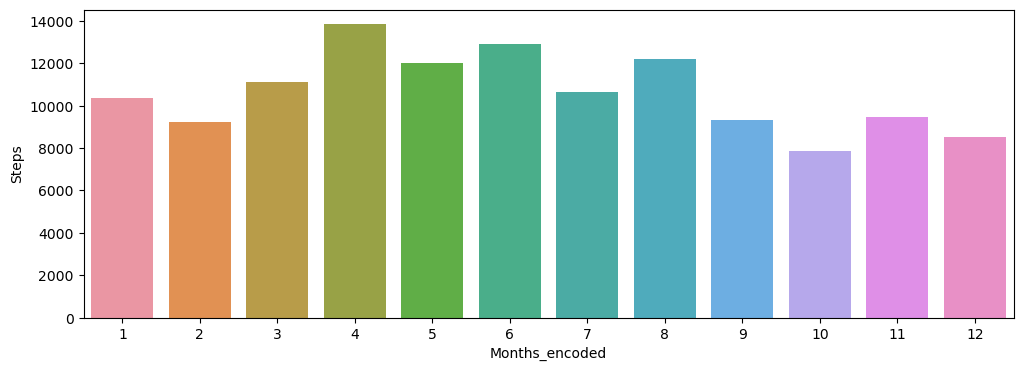

In [12]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

steps = fitbit.groupby('Months_encoded',numeric_only = True).median()
sns.barplot(x=steps.index, y = steps.Steps)

In [13]:
steps.head()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency
Months_encoded,,,,,,,,,,,,,,,,,,,,
1,3013.0,10366.0,7.92,9.0,671.0,254.0,24.0,28.0,1472.0,336.0,31.0,19.0,374.0,4.921258,3.0,1.0,5.600000,90.548780,5.600000,90.548780
2,2828.5,9235.0,7.26,11.0,724.5,194.0,24.0,25.5,1327.5,319.5,26.0,14.5,341.0,4.511153,3.0,1.0,5.325000,90.133162,5.416667,90.133162
3,2864.0,11122.0,8.66,12.0,638.0,199.0,9.0,39.0,1646.0,275.0,25.0,13.0,319.0,5.381073,3.0,1.0,4.583333,89.876033,4.566667,89.876033
4,3277.5,13846.5,11.56,13.0,674.5,290.5,8.5,50.5,1763.0,356.5,34.5,19.0,384.0,7.183049,3.0,1.0,5.941667,89.117776,5.850000,89.117776
5,2961.0,11998.0,8.91,12.0,684.0,218.0,18.0,43.0,1937.0,381.0,35.0,22.0,415.0,5.536416,3.0,1.0,6.350000,89.165187,6.283333,89.432990


C:\Users\pacot\AppData\Local\Temp\ipykernel_6044\2665592612.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  active = fitbit.groupby('Work_or_Weekend').mean()


<Axes: xlabel='Work_or_Weekend', ylabel='Steps'>

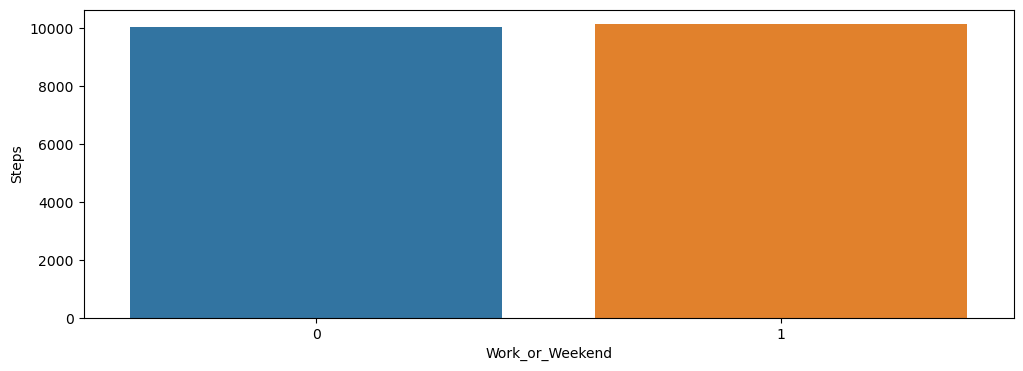

In [17]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
active = fitbit.groupby('Work_or_Weekend').mean()

sns.barplot(x=active.index, y = active.Steps)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

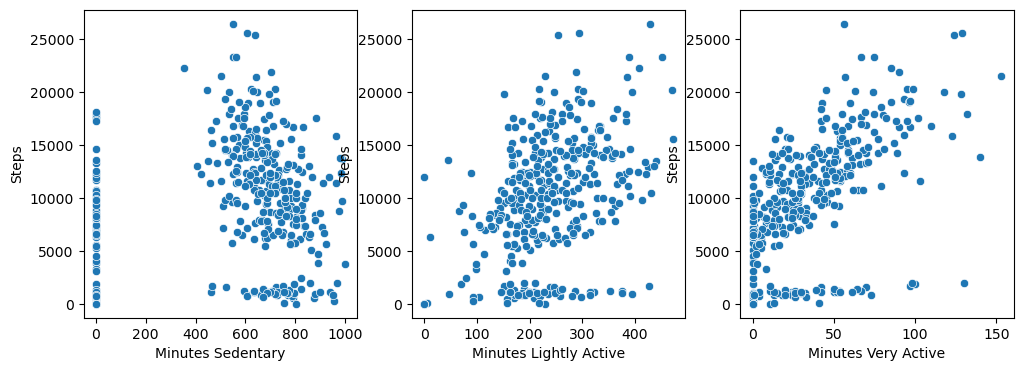

In [20]:
# your code here
columns = [fitbit.columns[5],fitbit.columns[6],fitbit.columns[8]]
fig, ax = plt.subplots(1, 3)    # figura de 1 fila 3 columnas

for i in range (3):
    

   sns.scatterplot(ax=ax[i], data=fitbit, 
                x=columns[i], 
                y='Steps')
    
plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [21]:
# your code here
titanic = pd.read_csv('../Data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [22]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [23]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['int', 'float']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [24]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object']).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [26]:
# your code here

plt.rcParams['figure.figsize']=(12, 6) 

#### Use the right visulalization to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

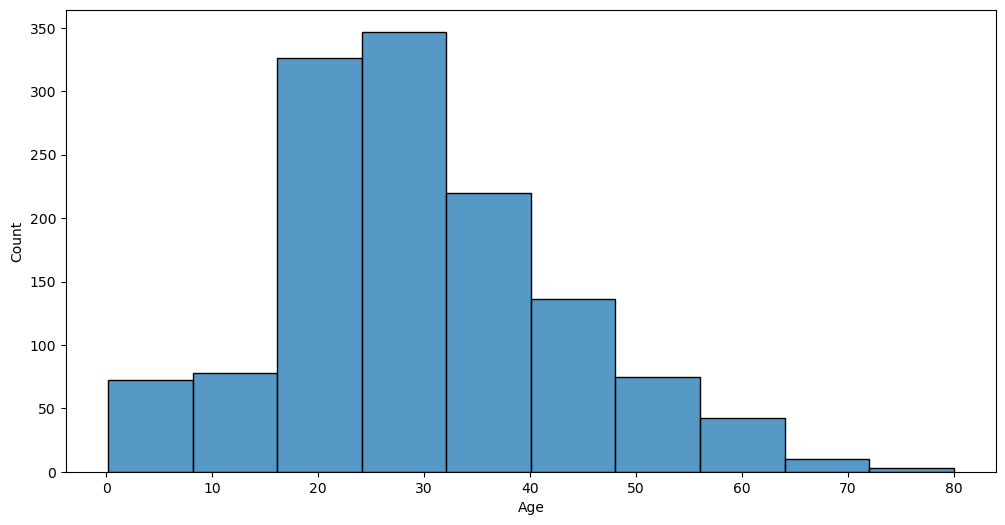

In [27]:
# your code here
sns.histplot(titanic['Age'],bins = 10)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

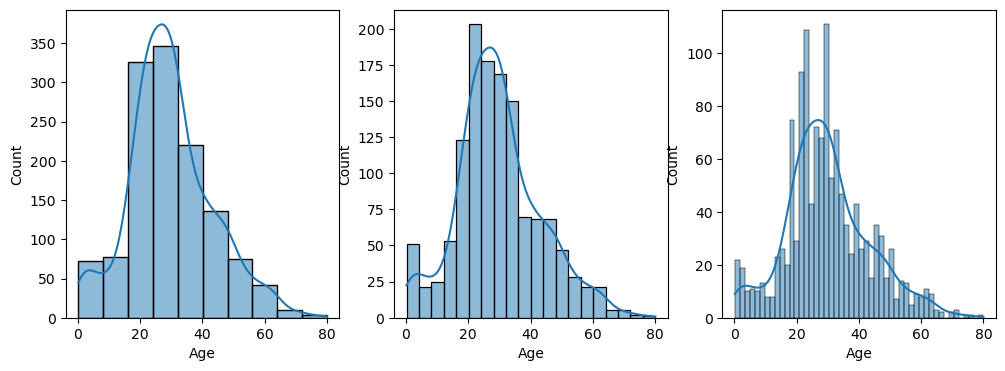

In [29]:
# your code here
fig, ax = plt.subplots(1, 3, figsize=(12,4)) 
bi=[10,20,50]
for i in range(3):
    sns.histplot(ax=ax[i], x=titanic.Age, kde=True, bins=bi[i] )

#### How does the bin size affect your plot?

In [ ]:
"""
Cuantos menos bins menor mayor es la generalización de los datos pudiendo perderse tanto el valor real de los outliers
como la diferencia entre ciertos valores (ej: mucha gente de 30 poca de 30 y pocos)

"""

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

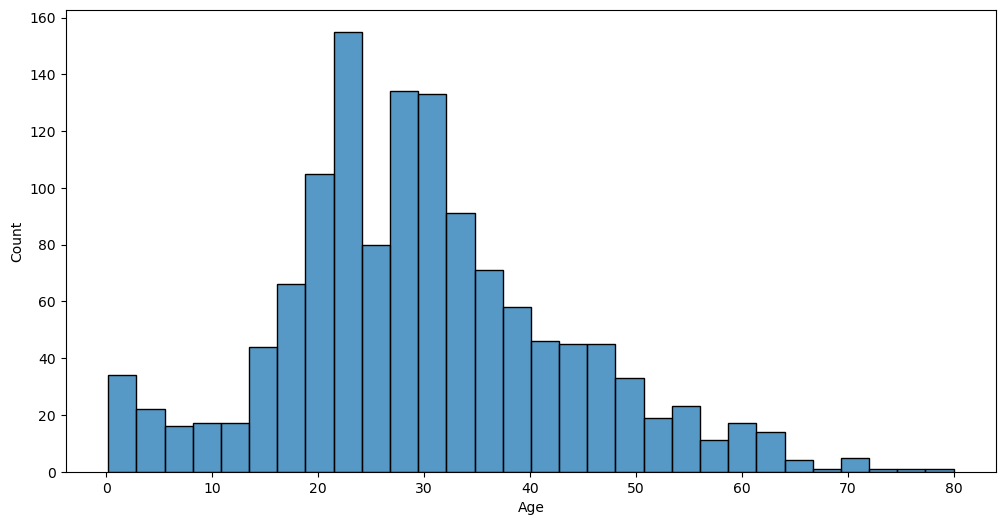

In [33]:
# your code here
sns.histplot(x = titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Count')

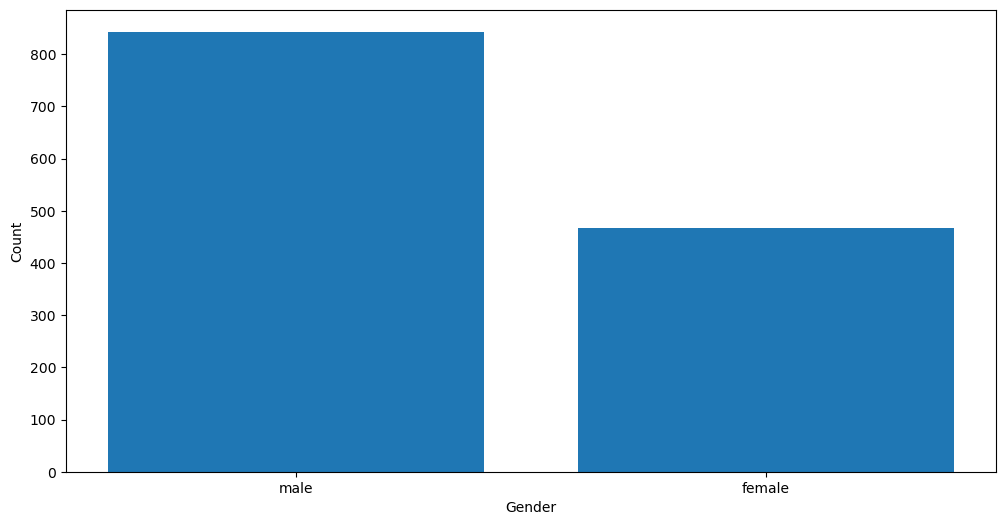

In [37]:
# Method 1 - matplotlib
# your code here
gender = titanic['Gender'].value_counts()

fig, ax = plt.subplots()
ax.bar(gender.index, gender.values)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

<Axes: xlabel='Gender', ylabel='Count'>

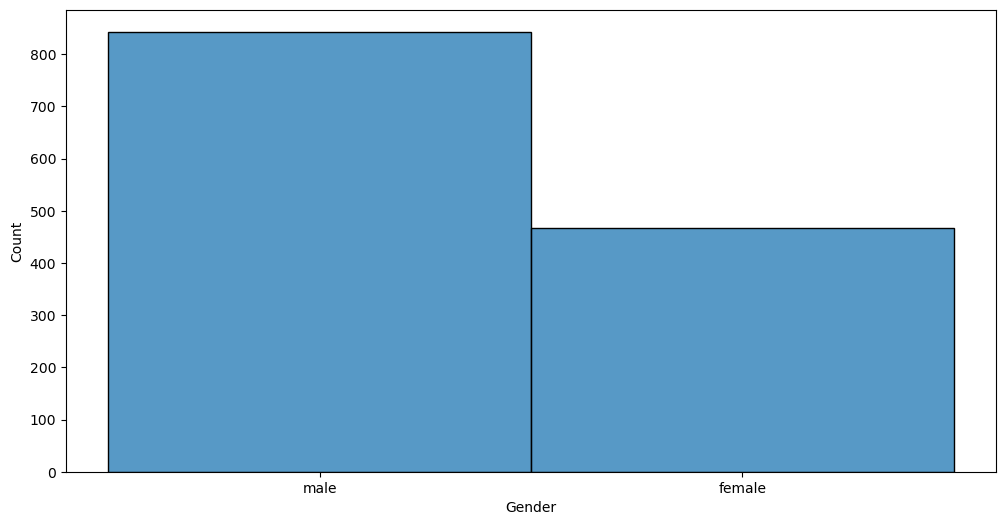

In [36]:
# Method 2 - seaborn
# your code here
sns.histplot(titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

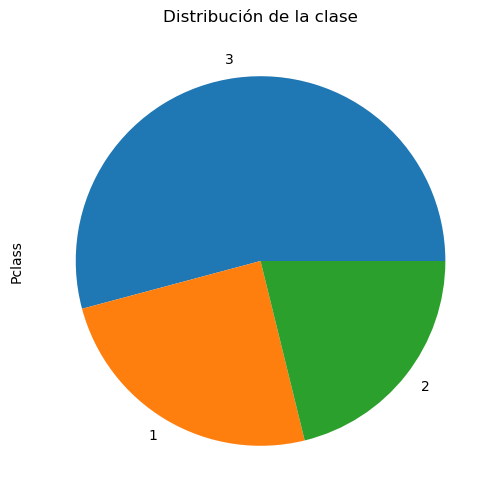

In [ ]:
# your code here
pclass_counts = titanic['Pclass'].value_counts()
pie_chart = pclass_counts.plot.pie()
pie_chart.set_title("Distribución de la clase")
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<Axes: >

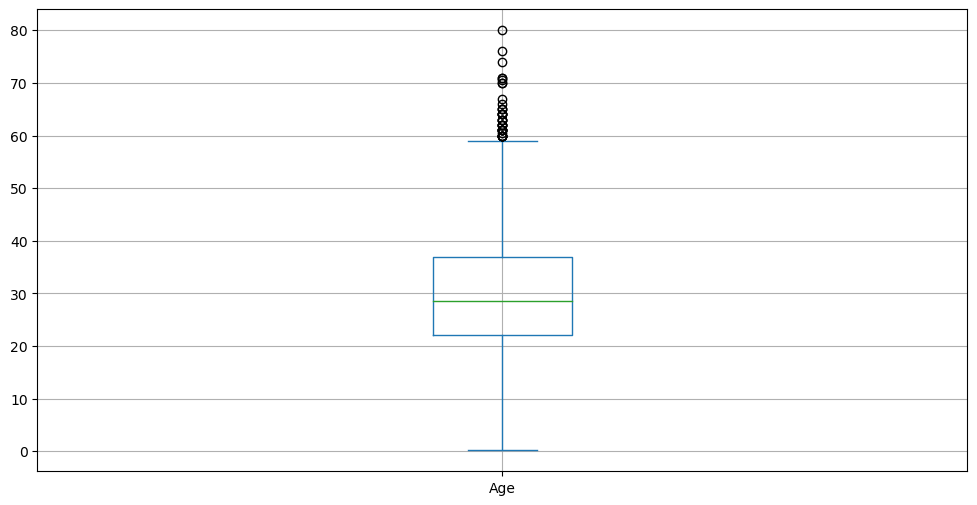

In [44]:
# your code here
titanic.Age.plot.box(grid=True)

In [ ]:
"""
Usaría un boxplot tal y como he hecho
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Que a partir de los 60 años existen múltiples outliers y la mediana está en torno a los 27
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

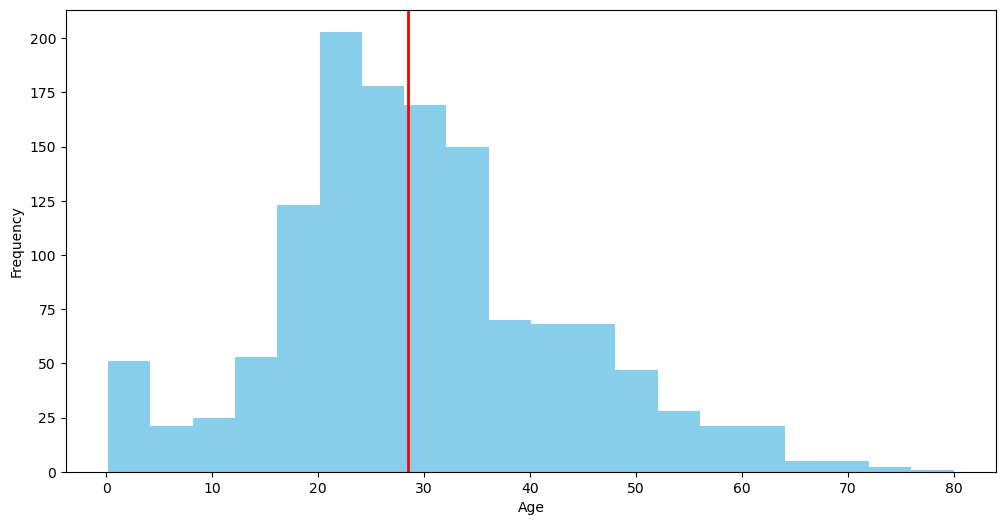

In [52]:
plt.hist(titanic.Age.dropna(), bins=20, color='skyblue')
plt.axvline(titanic.Age.median(), color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
La moda
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

C:\Users\pacot\AppData\Local\Temp\ipykernel_6044\2635115287.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()['Fare']


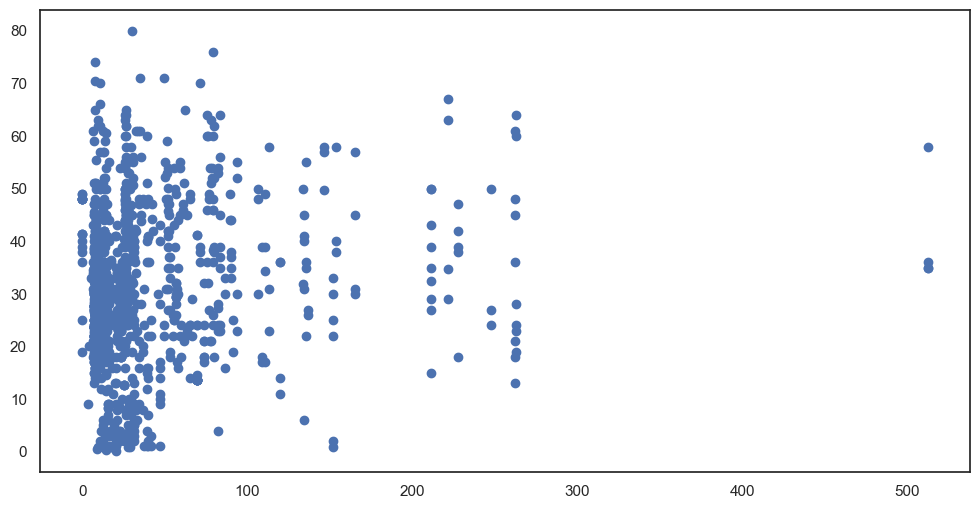

In [54]:
# Method 2 - seaborn
# your code here
corr = titanic.corr()['Fare']
corr = corr.iloc[3:6:3]
corr

plt.plot(titanic.Fare, titanic.Age, 'o');


#### Plot the correlation matrix using seaborn.

C:\Users\pacot\AppData\Local\Temp\ipykernel_6044\2157509863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr(method='pearson')


<Axes: >

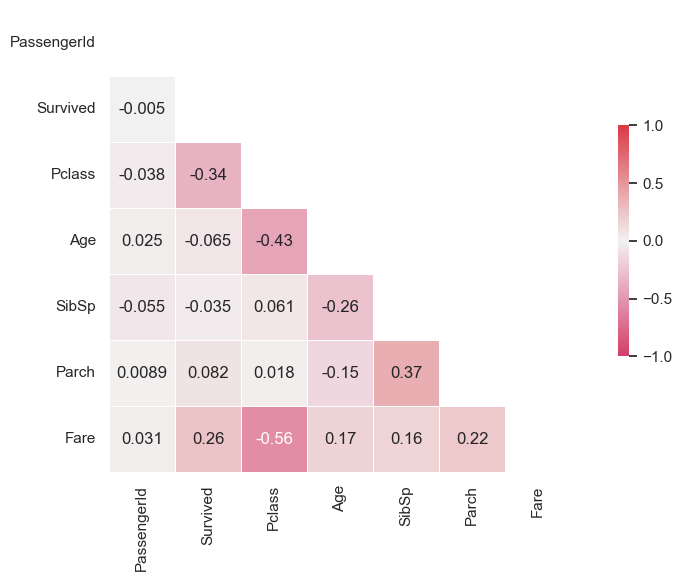

In [55]:
# your code here
corr = titanic.corr(method='pearson')

sns.set(style='white')                            # estilo blanco

mascara=np.triu(np.ones_like(corr, dtype=bool))   # generar mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # color
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
           )

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Pclass', ylabel='Age'>

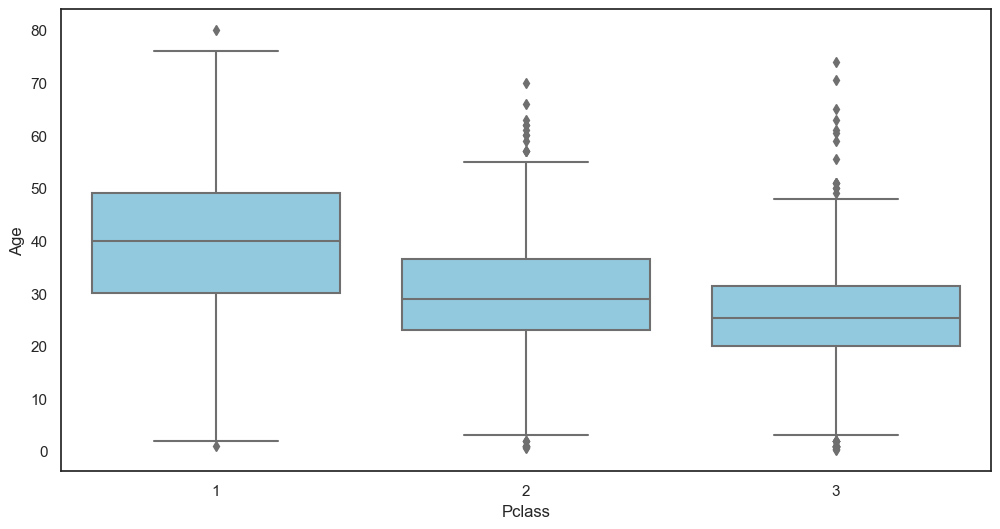

In [59]:
# your code here
sns.boxplot(x=titanic.Pclass, y=titanic.Age, color='skyblue')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

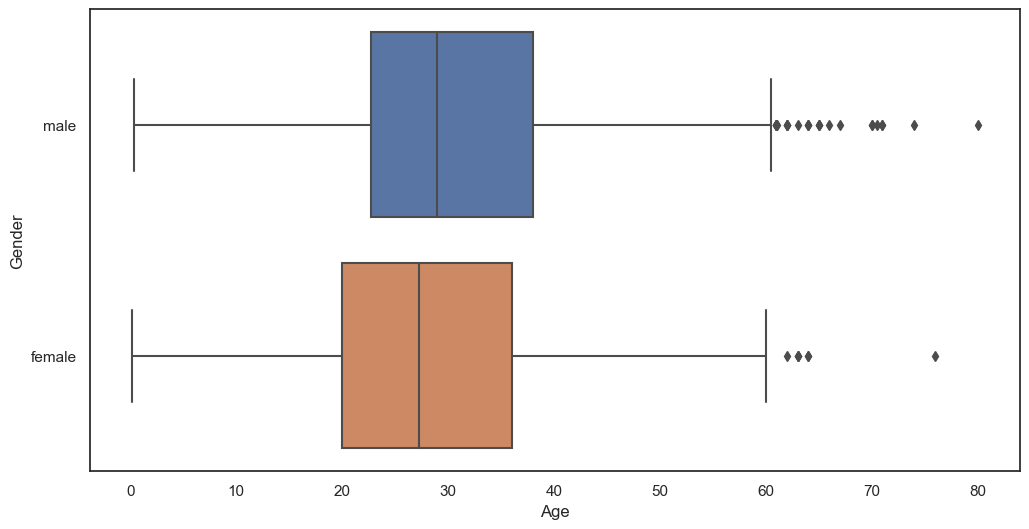

In [57]:
# your code here
sns.boxplot(x=titanic.Age, y=titanic.Gender);